# Script 9: Trabalhando com Diversos Arquivos
Neste exemplo vamos aprender como trabalhar com diversos arquivos utilizando o mesmo script:


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f000
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-22 00:00:00 UTC


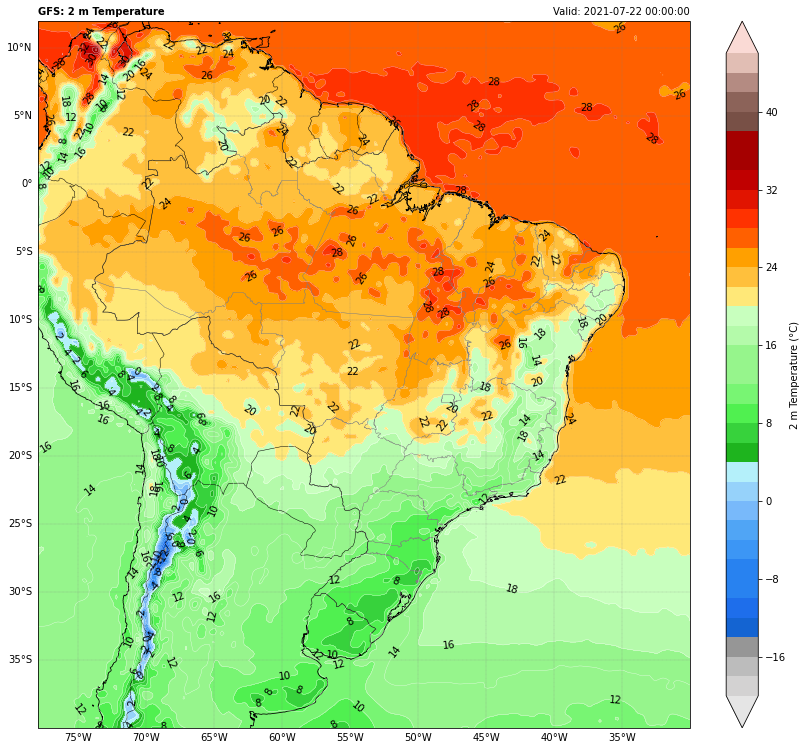


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f003
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +3
Valid: 2021-07-22 03:00:00 UTC


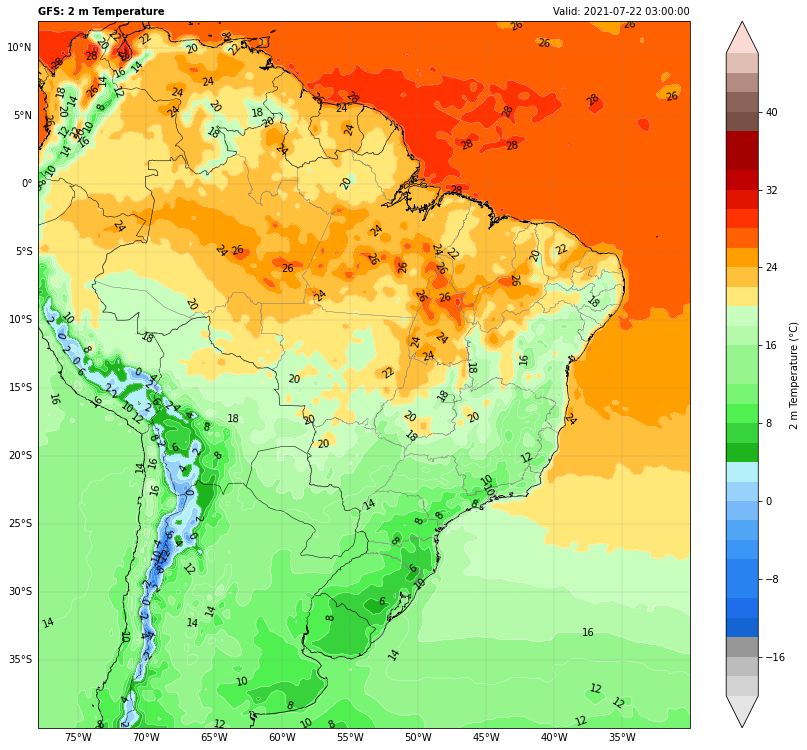


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f006
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +6
Valid: 2021-07-22 06:00:00 UTC


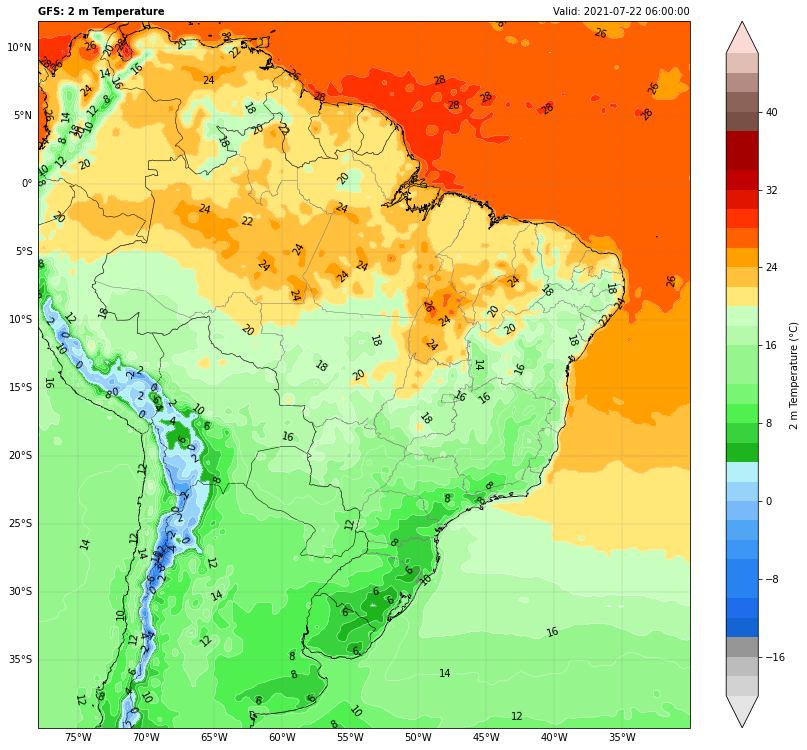


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f009
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +9
Valid: 2021-07-22 09:00:00 UTC


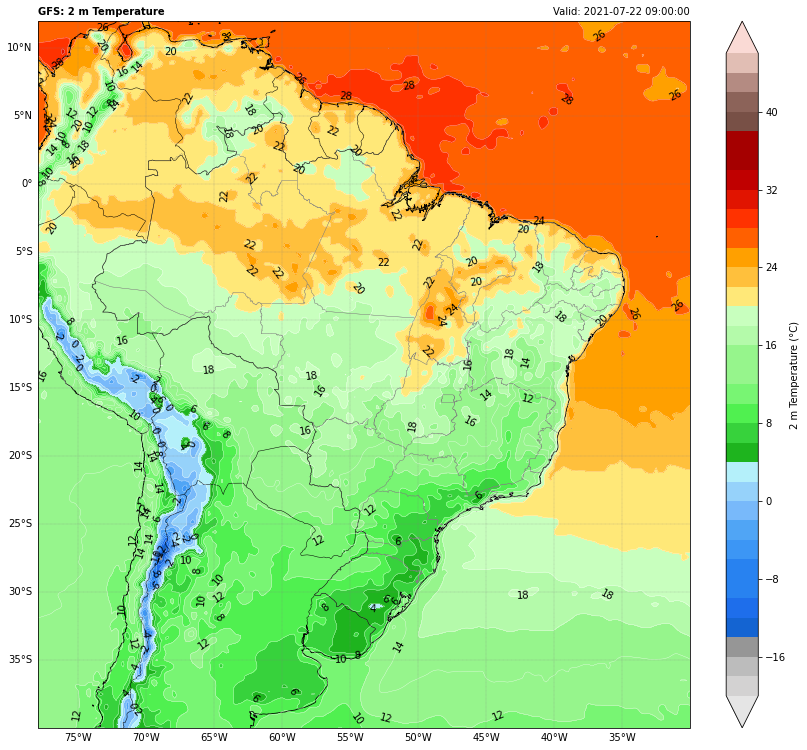


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f012
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +12
Valid: 2021-07-22 12:00:00 UTC


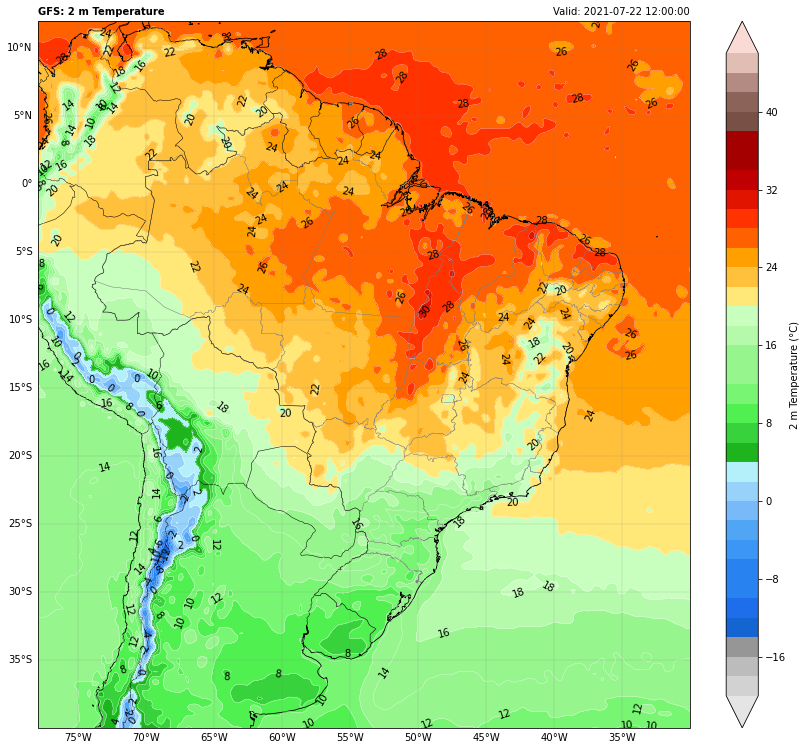


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f015
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +15
Valid: 2021-07-22 15:00:00 UTC


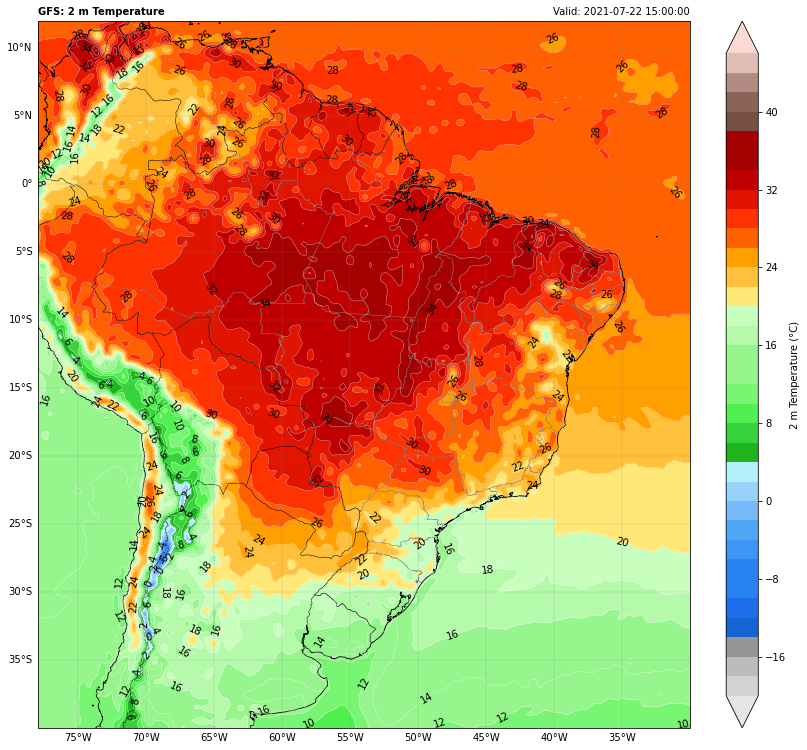


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f018
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +18
Valid: 2021-07-22 18:00:00 UTC


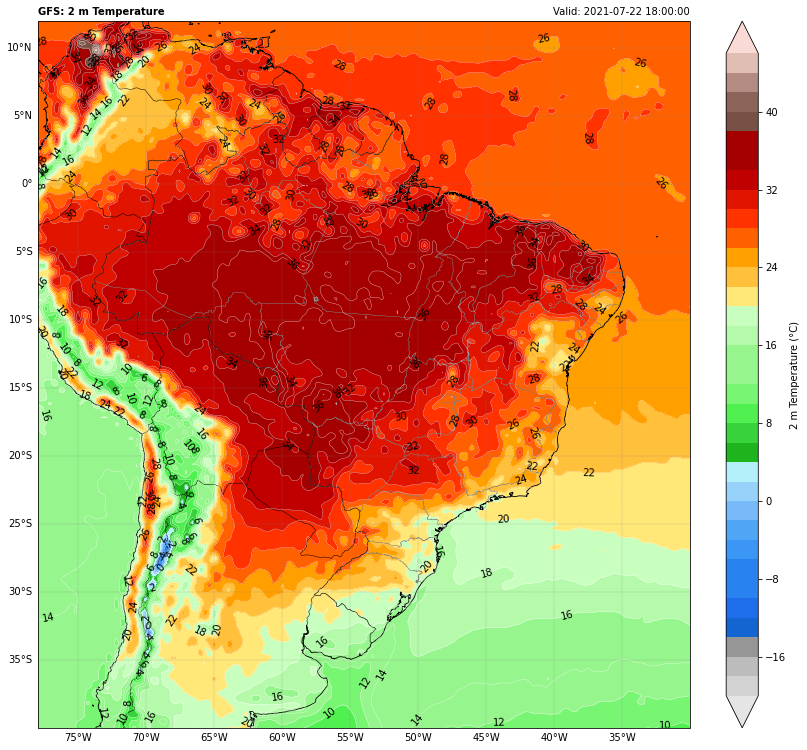


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f021
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +21
Valid: 2021-07-22 21:00:00 UTC


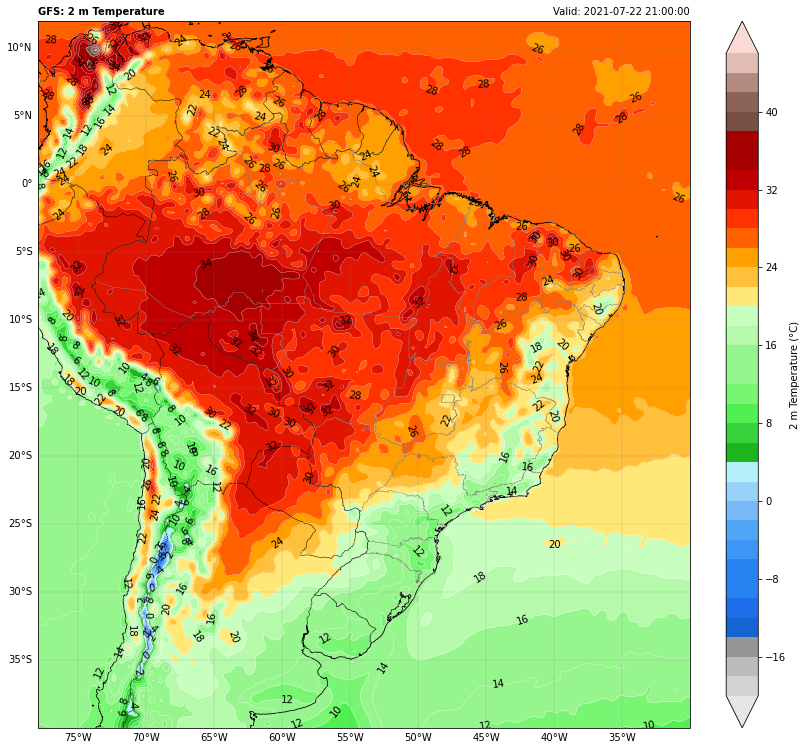


Processing file:  Samples/gfs.t00z.pgrb2.0p50.f024
Init: 2021-07-22 00:00:00 UTC
Run: 00Z
Forecast: +24
Valid: 2021-07-23 00:00:00 UTC


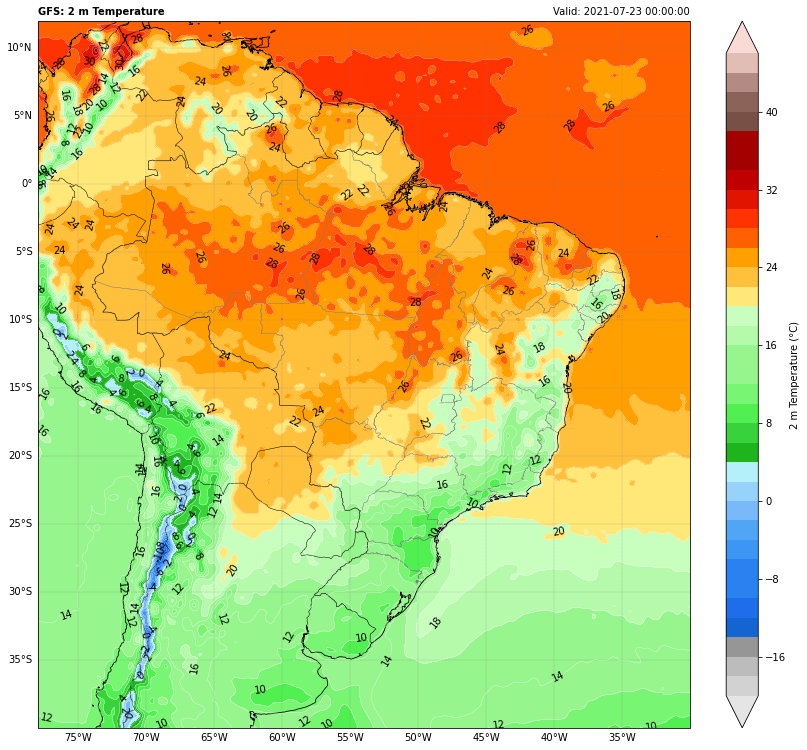

In [1]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 9: Working With Multiple Files
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
import os
import os.path
#----------------------------------------------------------------------------------------------------------- 

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-78.0, -40.00, -30.00, 12.00]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
file = "Samples/gfs.t00z.pgrb2.0p50.f"

# Data you want to process in the loop
# (to process only the analisys, end and inc should be equal).
hour_ini = 0   # Init time  
hour_end = 24  # End time
hour_int = 3   # Interval

for hour in range(hour_ini, hour_end + 1, hour_int):

    grib = file + str(hour).zfill(3)
    
    # If the file exists
    if (os.path.exists(grib)):
        
        # Process the file
        print("\nProcessing file: ", grib)

        # Read the GRIB file
        grib = pygrib.open(grib)
        
        # Select the variable
        grb = grib.select(name='2 metre temperature')[0]

        # Get information from the file    
        init  = str(grb.analDate)      # Init date / time
        run   = str(grb.hour).zfill(2) # Run
        ftime = str(grb.forecastTime)  # Forecast hour
        valid = str(grb.validDate)     # Valid date / time 
        print('Init: ' + init + ' UTC')
        print('Run: ' + run + 'Z')
        print('Forecast: +' + ftime)
        print('Valid: ' + valid + ' UTC')

        # Read the data for a specific region
        tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        #-----------------------------------------------------------------------------------------------------------
        # Convert from K to °C
        tmtmp = tmtmp - 273.15

        # Smooth the contours
        import scipy.ndimage
        tmtmp = scipy.ndimage.zoom(tmtmp, 3)
        lats = scipy.ndimage.zoom(lats, 3)
        lons = scipy.ndimage.zoom(lons, 3)

        #-----------------------------------------------------------------------------------------------------------
        # Choose the plot size (width x height, in inches)
        plt.figure(figsize=(13,13))

        # Use the Cilindrical Equidistant projection in cartopy
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Define the image extent
        img_extent = [extent[0], extent[2], extent[1], extent[3]]

        # Add a shapefile
        # https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
        shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
        ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

        # Add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color='black', linewidth=0.8)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False

        # Define de contour interval
        data_min = -20
        data_max = 48 
        interval = 2
        levels = np.arange(data_min,data_max,interval)

        # Create a custom color palette 
        colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
        "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
        "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
        "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
        "#8c6359", "#b48b82", "#e1beb4"]
        cmap = matplotlib.colors.ListedColormap(colors)
        cmap.set_over('#fadad5')
        cmap.set_under('#e5e5e5')

        # Plot the contours
        img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')    
        img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
        ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

        # Add a colorbar
        plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

        # Add a title
        plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
        plt.title('Valid: ' + valid, fontsize=10, loc='right')
        #----------------------------------------------------------------------------------------------------------- 

        # Save the image
        plt.savefig('Figure/image_loop_' + str(hour) + '.png', bbox_inches='tight', pad_inches=0, dpi=100)

        # Show the image
        plt.show()